In [1]:
import pandas as pd
import seaborn as sns


import skimage.io
import numpy as np
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt

In [ ]:
# # Загрузите ваше изображение (например, 'image.jpg')
# image = skimage.io.imread('Single Images/3.jpg')
# image = rgb2gray(image)
# 
# crop_width = 380
# 
# # Создайте обрезанные копии
# left_cropped = image[:, :crop_width]  # Обрезанная копия слева
# right_cropped = image[:, -crop_width:]  # Обрезанная копия справа
# 
# 
# fig, (ax0, ax1) = plt.subplots(
#     nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True
# )
# 
# ax0.imshow(left_cropped, cmap=plt.cm.gray)
# ax0.axis('off')
# ax1.imshow(right_cropped, cmap=plt.cm.gray)
# ax1.axis('off')
# 
# plt.show()

In [ ]:
# fig, (ax0) = plt.subplots(
#     nrows=1, ncols=1, figsize=(20, 10), sharex=True, sharey=True
# )
# 
# ax0.imshow(image, cmap=plt.cm.gray)
# ax0.axis('off')
# 
# plt.show()

In [ ]:
# from skimage import io
# from skimage.util import crop
# import matplotlib.pyplot as plt
# 
# image = io.imread('Single Images/399x399.jpg')
# # Проверка размеров изображения
# print(f'Original dimensions: {image.shape}')
# 
# # Обрезка изображения
# dy_top_1, dy_top_2 = 10, 8
# dy_bottom_1, dy_bottom_2 = 10, 12
# dx_left_1, dx_left_2 = 20, 0
# dx_right_1, dx_right_2 = 0, 20
# 
# cropped_image_1 = crop(image, ((dy_top_1, dy_bottom_1), (dx_left_1, dx_right_1), (0,0)), copy=False)
# cropped_image_2 = crop(image, ((dy_top_2, dy_bottom_2), (dx_left_2, dx_right_2), (0,0)), copy=False)
# 
# # Проверка размеров изображения
# print(f'Image 1 dimensions: {cropped_image_1.shape}')
# print(f'Image 2 dimensions: {cropped_image_2.shape}')
# 
# fig, (ax0, ax1) = plt.subplots(
#     nrows=1, ncols=2, figsize=(20, 10), sharex=True, sharey=True
# )
# 
# ax0.imshow(cropped_image_1, cmap=plt.cm.gray)
# ax0.axis('off')
# ax1.imshow(cropped_image_2, cmap=plt.cm.gray)
# ax1.axis('off')
# 
# plt.show()

In [ ]:
# r1 = skimage.io.imread('r1.jpg')
# r1.shape

In [ ]:
# raft_img = skimage.io.imread('raft_frame_0016.png')
# raft_img.shape

In [ ]:
# !pip install netCDF4

In [2]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import netCDF4 as nc
fn = 'uvi_20200107_000445_365_l3b_v21.nc'
ds = nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Akatsuki Level 3
    history: Produced by Akatsuki L2/L3 Converter Version 3.7 (hgid: 7b81c2b8b5a5) (2023-06-03 04:15:24 UTC)
    institute: ISAS/JAXA
    source: uvi_20200107_000445_365_l2b_v21.fit, uvi_20200107_000445_365_geo_v21.fit
    references: Ogohara et al. (2012), Automated cloud tracking system for the Akatsuki Venus Climate Orbiter data, Icarus, 217, 2, 661-668, doi:10.1016/j.icarus.2011.05.017; Kouyama et al. (2013), A method to estimate optical distortion using planetary images, Planet. Space Sci., 86, 86-90, doi:10.1016/j.pss.2013.06.027; Ogohara et al. (2017), Overview of Akatsuki data products: definition of data levels, method and accuracy of geometric correction, Earth Planets Space, 69:167, https://doi.org/10.1186/s40623-017-0749-5
    comments: Akatsuki L3 data comes with ABSOLUTELY NO WARRANTY. See variables for data details.
    Conventions: CF-1.7
    command

In [4]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (2880,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (1440,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int16 src_index(src_index)
    long_name: src_index
unlimited dimensions: 
current shape = (4,)
filling on, default _FillValue of -32767 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: observation time
    units: hours since 2000-1-1 00:00:00 UTC
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 radiance(time, latitude, longitude)
    long_name: radiance
    units: W/m2/sr/m
    _FillValue: -3

In [5]:
ds['radiance']

<class 'netCDF4._netCDF4.Variable'>
float32 radiance(time, latitude, longitude)
    long_name: radiance
    units: W/m2/sr/m
    _FillValue: -3.4028235e+38
    valid_min: -3.2326822e+38
    valid_max: 3.2326822e+38
    missing_value: -3.4028235e+38
unlimited dimensions: 
current shape = (1, 1440, 2880)
filling on

In [6]:
ds['radiance'][:].shape
# swapped_data = np.swapaxes(ds['radiance'][:], 0, 2)
# swapped_data = swapped_data.swapaxes(0, 1)
# swapped_data.shape

reshaped_data = ds['radiance'][:].reshape(1440, 2880, 1)
reshaped_data.shape

(1440, 2880, 1)

In [7]:
img_1 = ds['radiance'][0, :, :]
img_2 = nc.Dataset('uvi_20200107_020445_365_l3b_v21.nc')['radiance'][0, :, :]

In [8]:
longitude = ds['longitude'][:].data
longitude

array([6.250000e-02, 1.875000e-01, 3.125000e-01, ..., 3.596875e+02,
       3.598125e+02, 3.599375e+02], dtype=float32)

In [9]:
latitude = ds['latitude'][:].data
latitude

array([-89.9375, -89.8125, -89.6875, ...,  89.6875,  89.8125,  89.9375],
      dtype=float32)

In [10]:
np.save('longitude.npy', longitude)
np.save('latitude.npy', latitude)

In [67]:
# Создаем новый массив размером (1440, 2880)
coords = np.zeros((1440, 2880))

# Заполняем новый массив
# Можно заполнять его данными из data1 и data2, например так:
coords[:, :1] = latitude[:, None]  # Заполняем первый столбец (или используйте любое другое размещение)
coords[:1, :] = longitude[None, :]  # Заполняем первую строку (или используйте любое другое размещение)

# Проверка результата
np.set_printoptions(formatter={'float_kind': lambda x: f"{x:.4f}"})
print(f"{coords[700, 0]}, {coords[0, 700]}")  # Должно вывести (1440, 2880)

-2.4375, 87.5625


In [80]:
import numpy as np

# Создаем координатную сетку
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Сетка будет иметь форму (1440, 2880) для широты и (1440, 2880) для долготы
# Теперь можно объединить их в один массив, где первая ось — широта, вторая — долгота
coords = np.stack((lat_grid, lon_grid), axis=-1)

# Проверка формы
print(coords.shape)  # Должно вывести (1440, 2880, 2)

# Пример доступа к координате
# Получим координаты (700, 700)
# latitude_coord = coords[700, 700, 0]  # широта
# longitude_coord = coords[700, 700, 1]  # долгота
# print(latitude_coord, longitude_coord)
print(coords[700:705, 700:705, :])

(1440, 2880, 2)
[[[-2.4375 87.5625]
  [-2.4375 87.6875]
  [-2.4375 87.8125]
  [-2.4375 87.9375]
  [-2.4375 88.0625]]

 [[-2.3125 87.5625]
  [-2.3125 87.6875]
  [-2.3125 87.8125]
  [-2.3125 87.9375]
  [-2.3125 88.0625]]

 [[-2.1875 87.5625]
  [-2.1875 87.6875]
  [-2.1875 87.8125]
  [-2.1875 87.9375]
  [-2.1875 88.0625]]

 [[-2.0625 87.5625]
  [-2.0625 87.6875]
  [-2.0625 87.8125]
  [-2.0625 87.9375]
  [-2.0625 88.0625]]

 [[-1.9375 87.5625]
  [-1.9375 87.6875]
  [-1.9375 87.8125]
  [-1.9375 87.9375]
  [-1.9375 88.0625]]]


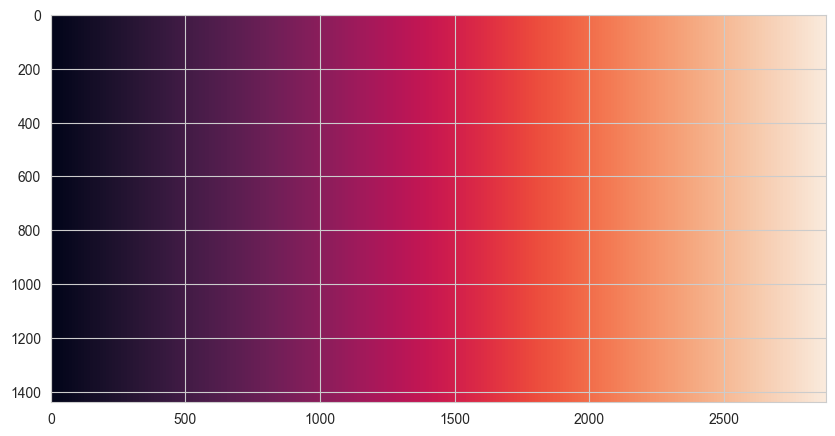

In [84]:
fig, ax = plt.subplots(
    figsize=(10, 10), sharex=True, sharey=True
)

ax.imshow(coords[:, :, 1])#, cmap=plt.cm.gray)
# ax0.axis('off')
# ax0.set_xticks(np.arange(0, len(longitude), step=360))
# ax0.set_xticklabels(longitude[::360])
# ax0.set_yticks(np.arange(0, len(latitude), step=180))
# ax0.set_yticklabels(latitude[::180])



plt.show()

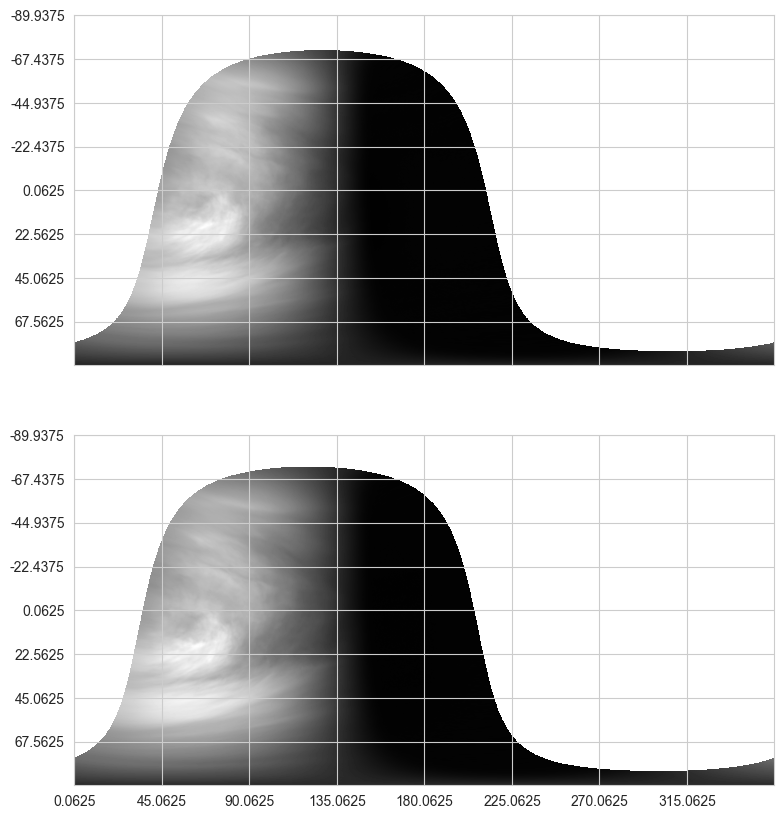

In [86]:
fig, (ax0, ax1) = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 10), sharex=True, sharey=True
)

ax0.imshow(img_1, cmap=plt.cm.gray)
# ax0.axis('off')
ax1.imshow(img_2, cmap=plt.cm.gray)
# ax1.axis('off')
# ax0.set_xticks(np.arange(0, len(longitude), step=360))
# ax0.set_xticklabels(longitude[::360])
# ax0.set_yticks(np.arange(0, len(latitude), step=180))
# ax0.set_yticklabels(latitude[::180])

ax1.set_xticks(np.arange(0, len(longitude), step=360))
ax1.set_xticklabels(longitude[::360])
ax1.set_yticks(np.arange(0, len(latitude), step=180))
ax1.set_yticklabels(latitude[::180])

plt.show()

In [87]:
import skimage as ski

normalized_img_1 = (img_1 - np.min(img_1)) / (np.max(img_1) - np.min(img_1))
normalized_img_2 = (img_2 - np.min(img_2)) / (np.max(img_2) - np.min(img_2))
normalized_img_1.shape

# reshaped_img_1 = normalized_img_1.reshape(1440, 2880, 1)
# reshaped_img_2 = normalized_img_2.reshape(1440, 2880, 1)

# reshaped_img_1.fill_value = 0

filled_img_1 = np.ma.filled(normalized_img_1, fill_value=0)
filled_img_2 = np.ma.filled(normalized_img_2, fill_value=0)

print(type(filled_img_1))

# reshaped_img_1.mask = [0]
# print(reshaped_img_1[~reshaped_img_1.mask].data.shape)


img_1_uint8 = ski.util.img_as_ubyte(filled_img_1.data)
img_2_uint8 = ski.util.img_as_ubyte(filled_img_2.data)
img_1_uint8.shape

rgb_1 = gray2rgb(img_1_uint8, channel_axis=-1)
rgb_2 = gray2rgb(img_2_uint8, channel_axis=-1)
rgb_1.shape

<class 'numpy.ndarray'>


(1440, 2880, 3)

In [88]:
rgb_1

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[37, 37, 37],
        [37, 37, 37],
        [37, 37, 37],
        ...,
        [37, 37, 37],
        [37, 37, 37],
        [37, 37, 37]],

       [[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]],

       [[36, 36, 36],
        [36, 36, 36],
        [36, 36, 36],
        ...,
        [36, 36, 36],
        [36, 36, 36],
        [36, 36, 36]]], dtype=uint8)

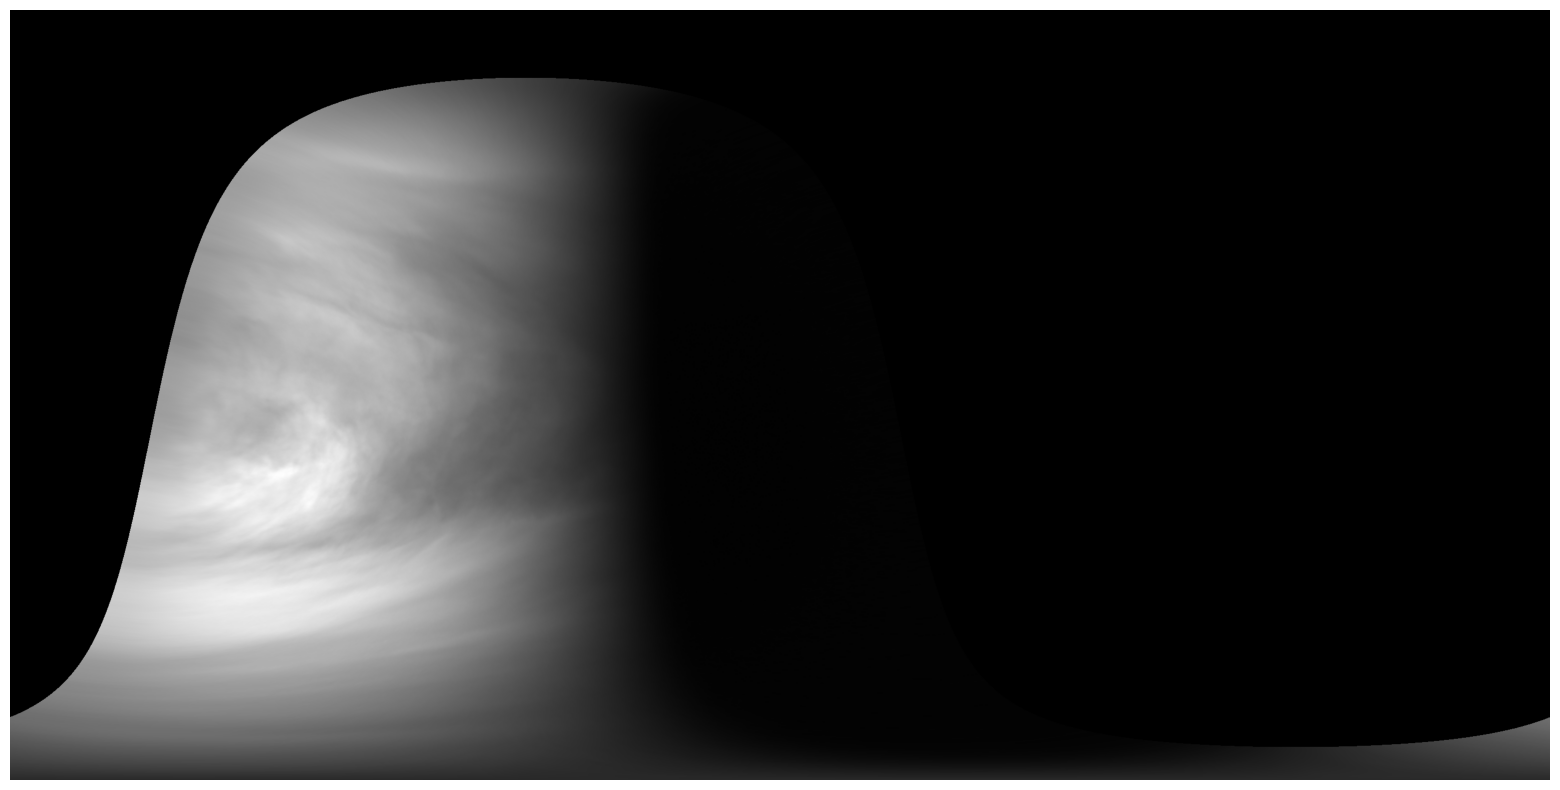

In [94]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(20, 10), sharex=True, sharey=True
)

ax.imshow(rgb_2, cmap=plt.cm.gray)
ax.axis('off')

plt.show()

In [91]:
rgb_2.shape

(1440, 2880, 3)

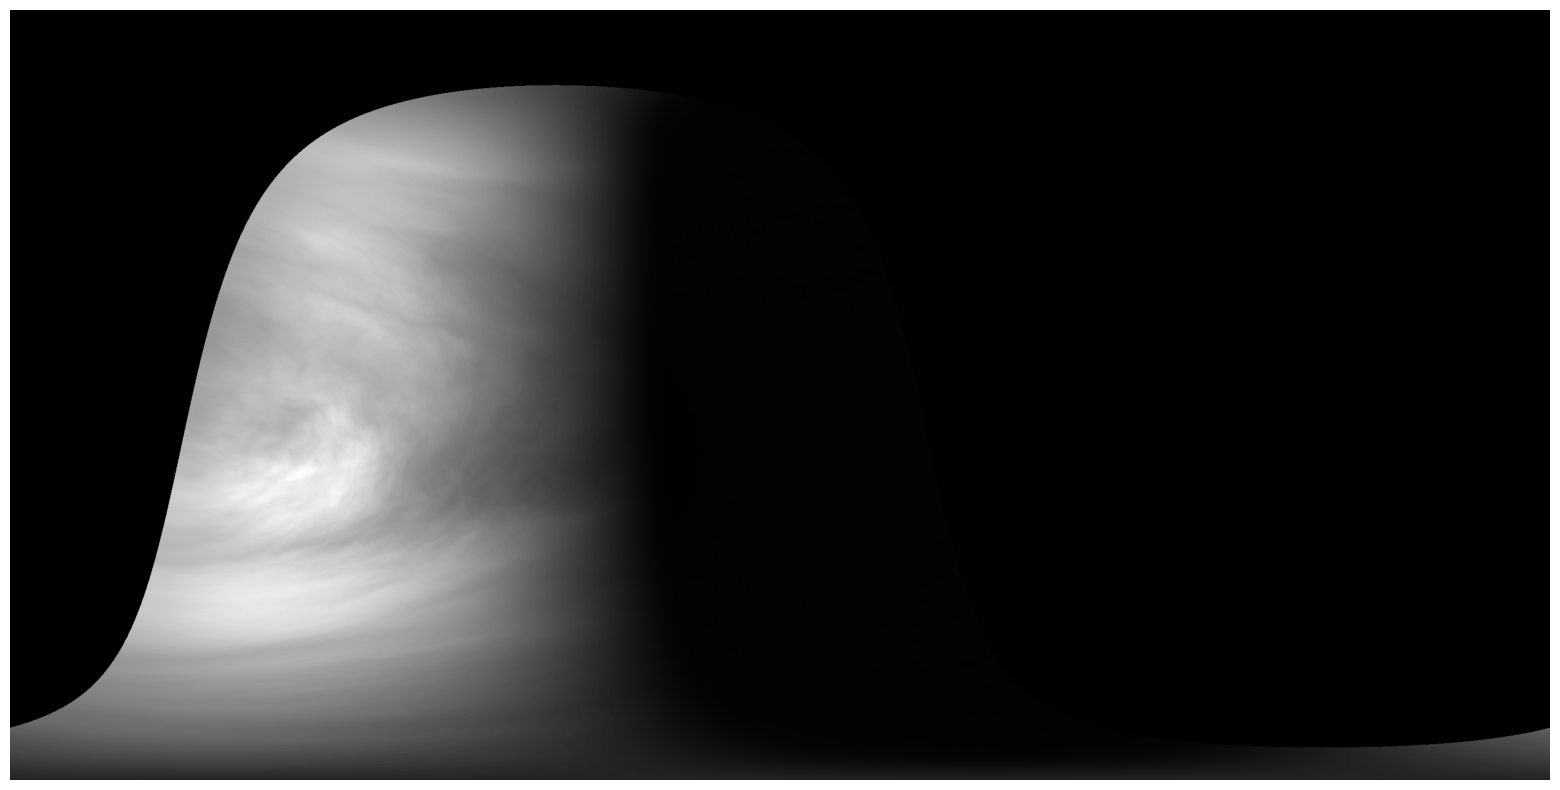

In [114]:
rgb_1_meta = np.concatenate((rgb_1, coords), axis=-1)
rgb_2_meta = np.concatenate((rgb_1, coords), axis=-1)

fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(20, 10), sharex=True, sharey=True
)

ax.imshow(rgb_1_meta[:, :, 0], cmap=plt.cm.gray)
ax.axis('off')

plt.show()

In [115]:
import os

output_folder = 'rgb+meta'
os.makedirs(output_folder, exist_ok=True)

jpg_file_path_1 = os.path.join(output_folder, 'rgb_1_meta.npy')
jpg_file_path_2 = os.path.join(output_folder, 'rgb_2_meta.npy')

np.save(jpg_file_path_1, rgb_1_meta)
np.save(jpg_file_path_2, rgb_2_meta)


In [20]:
!pip install PyWavelets


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


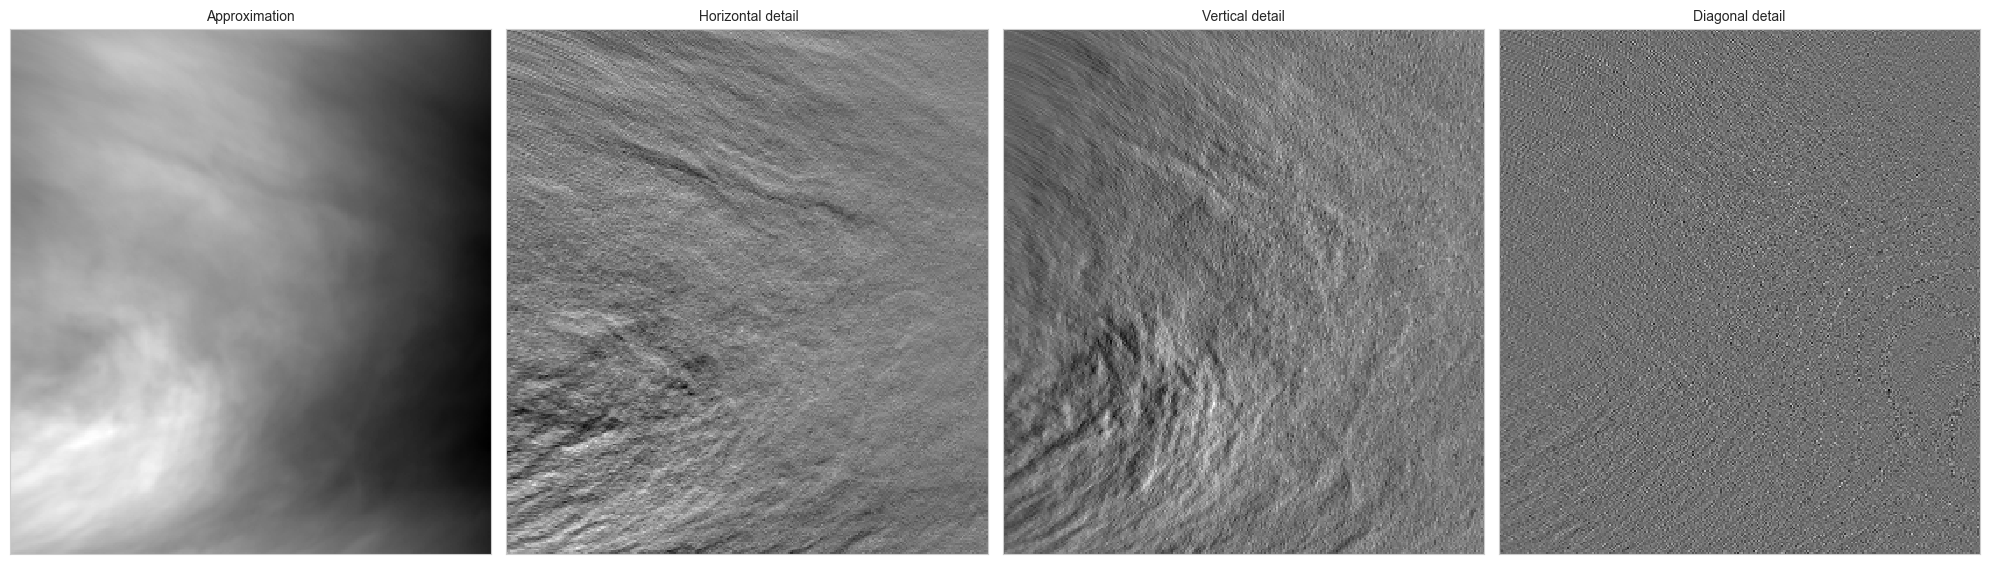

In [164]:
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

# Load image
original = img_1[400:1000, 450:1000]

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, LLH) = coeffs2
fig = plt.figure(figsize=(20, 15))
for i, a in enumerate([LL, LH, HL, LLH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [157]:
# Load image
original = img_1

# Perform 3-level wavelet transformation
coeffs3 = pywt.wavedec2(original, 'bior1.3', level=3)

# Prepare figure for 12 subplots
fig = plt.figure(figsize=(20, 10))

# Extract coefficients for visualization
# Level 3
LL3, (LH3, HL3, HH3) = coeffs3[0]
# Level 2
LL2, (LH2, HL2, HH2) = coeffs3[1]
# Level 1
LL1, (LH1, HL1, HH1) = coeffs3[2]

# Store all components for plotting
components = [LL3, LH3, HL3, HH3, LL2, LH2, HL2, HH2, LL1, LH1, HL1, HH1]

# Plot all components
for i, a in enumerate(components):
    ax = fig.add_subplot(4, 3, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


ValueError: too many values to unpack (expected 2)

<Figure size 2000x1000 with 0 Axes>

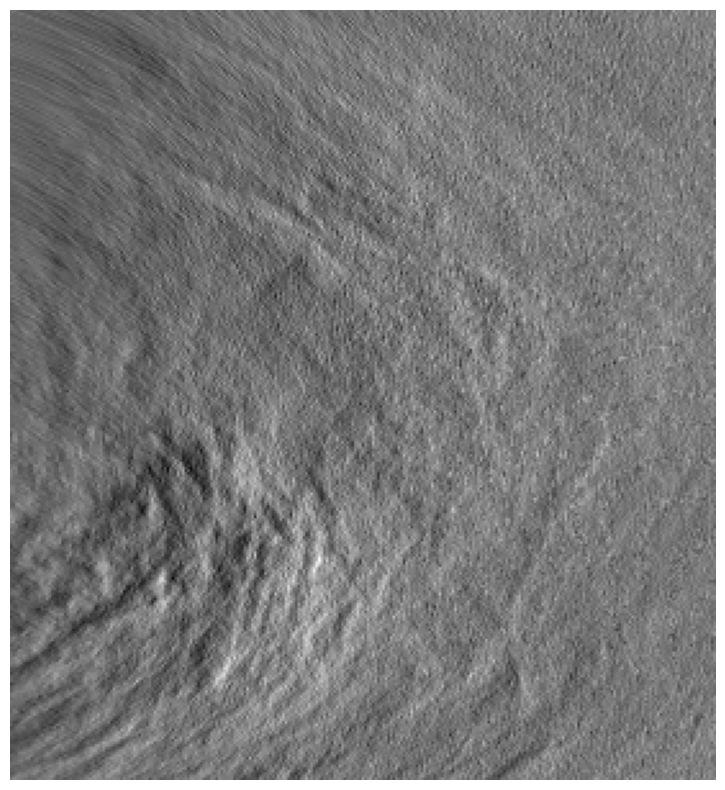

In [165]:
fig, ax = plt.subplots(
    nrows=1, ncols=1, figsize=(20, 10), sharex=True, sharey=True
)

ax.imshow(HL, cmap=plt.cm.gray)
ax.axis('off')

plt.show()

TypeError: Invalid shape (3, 363, 723) for image data

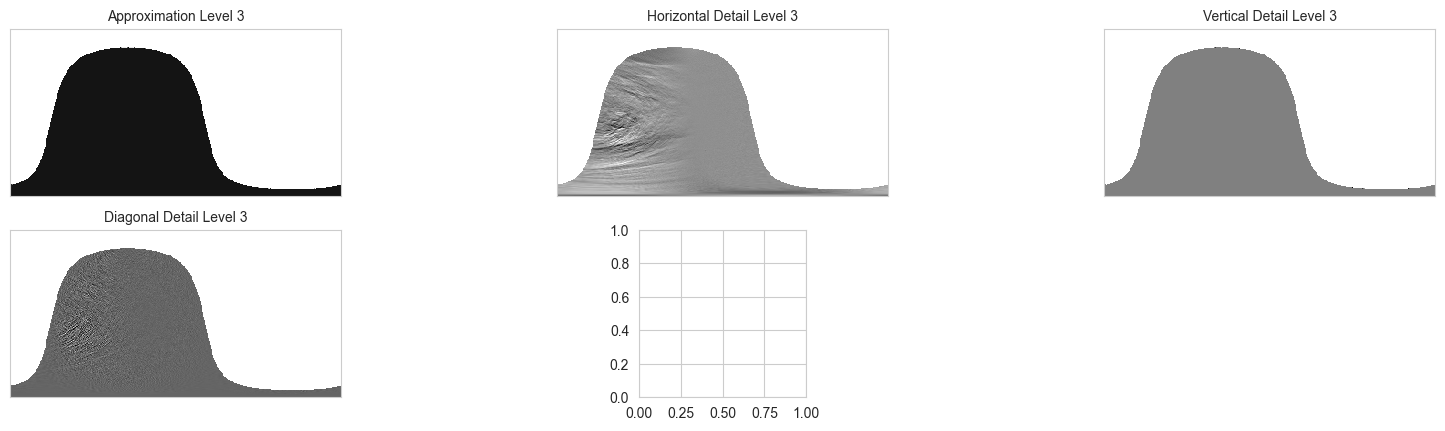

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
import pywt.data

# Load image
original = img_1

# Perform 3-level wavelet transformation
coeffs3 = pywt.wavedec2(original, 'bior1.3', level=3)

# Titles for each level's components
titles = [
    'Approximation Level 3', 'Horizontal Detail Level 3', 'Vertical Detail Level 3', 'Diagonal Detail Level 3',
    'Approximation Level 2', 'Horizontal Detail Level 2', 'Vertical Detail Level 2', 'Diagonal Detail Level 2',
    'Approximation Level 1', 'Horizontal Detail Level 1', 'Vertical Detail Level 1', 'Diagonal Detail Level 1'
]

# Prepare figure for 12 subplots
fig = plt.figure(figsize=(20, 10))

# Extract coefficients for visualization
# Level 3
LL3 = coeffs3[0]
LH3, HL3, HH3 = coeffs3[1]
# Level 2
LL2 = coeffs3[2]
LH2, HL2, HH2 = coeffs3[3]
# # Level 1
# LL1 = coeffs3[4]
# LH1, HL1, HH1 = coeffs3[5]

# Store all components for plotting
components = [LL3, LH3, HL3, HH3, LL2, LH2, HL2, HH2]#, LL1, LH1, HL1, HH1]

# Plot all components
for i, a in enumerate(components):
    ax = fig.add_subplot(4, 3, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()


In [60]:
print(pywt.wavelist('bior'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']


In [14]:
import cv2

test_1 = cv2.imread('output1.jpg')
test_2 = cv2.imread('output2.jpg')

In [18]:
test_2.min()

np.uint8(0)

In [13]:
# rgb_1 = skimage.io.imread('output1_c.jpg')
# rgb_2 = skimage.io.imread('output2_c.jpg')

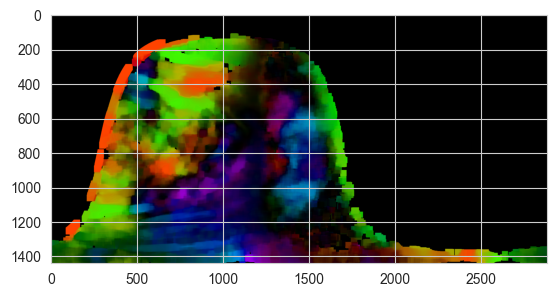

In [14]:
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
# 
# # Вычисление Optical Flow
# flow = cv2.optflow.createOptFlow_SimpleFlow()
# flow_mat = flow.calc(rgb_1, rgb_2, None)
# flow_mat = np.nan_to_num(flow_mat)
# 
# # Отображение Optical Flow
# hsv = np.zeros_like(rgb_1)
# hsv[..., 1] = 255
# 
# mag, ang = cv2.cartToPolar(flow_mat[..., 0], flow_mat[..., 1])
# # mag = np.nan_to_num(mag)
# # ang = np.nan_to_num(ang)
# 
# hsv[..., 0] = ang * 180 / np.pi / 2
# hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
# rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
# gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# 
# %matplotlib inline
# 
# plt.imshow(rgb)
# plt.show()

In [15]:
# print(flow_mat.shape)
# estimated_flow = np.moveaxis(flow_mat, -1, 0)
# estimated_flow.shape

(1440, 2880, 2)


(2, 1440, 2880)

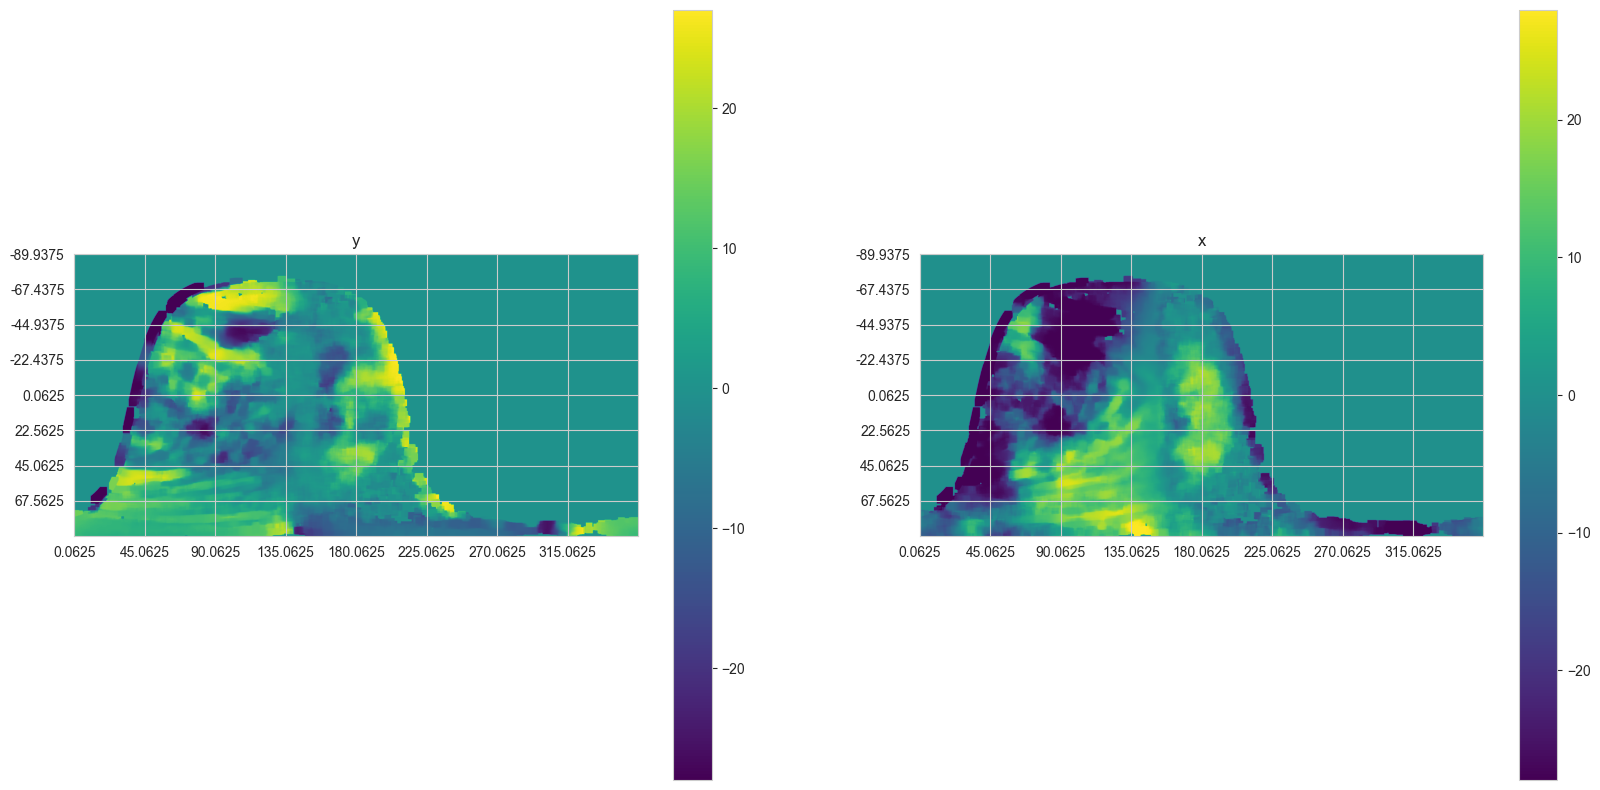

In [16]:
# # визуализация предсказанного потока
# 
# estimated_flow[[0, 1], :, :] = estimated_flow[[1, 0], :, :]
# 
# shape = rgb_1[:, :, 0].shape
# 
# longitude = ds['longitude'][:].data
# latitude = ds['latitude'][:].data
# 
# fig, axs = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)
# 
# img = axs[0].imshow(estimated_flow[0], cmap="viridis")
# axs[0].set(title='y')
# axs[0].set_xticks(np.arange(0, len(longitude), step=360))
# axs[0].set_xticklabels(longitude[::360])
# axs[0].set_yticks(np.arange(0, len(latitude), step=180))
# axs[0].set_yticklabels(latitude[::180])
# plt.colorbar(img, ax=axs[0])
# 
# img = axs[1].imshow(estimated_flow[1], cmap="viridis")
# axs[1].set(title='x')
# axs[1].set_xticks(np.arange(0, len(longitude), step=360))
# axs[1].set_xticklabels(longitude[::360])
# axs[1].set_yticks(np.arange(0, len(latitude), step=180))
# axs[1].set_yticklabels(latitude[::180])
# 
# plt.colorbar(img, ax=axs[1])
# plt.show()

In [17]:
# estimated_flow[1][400:]

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-10.504383  , -10.545322  , -10.638795  , ...,  -0.97703683,
         -0.7347332 ,  -0.4984261 ],
       [-10.515398  , -10.537947  , -10.592288  , ...,  -1.3290331 ,
         -1.0815274 ,  -0.84094626],
       [-10.470221  , -10.488476  , -10.527525  , ...,  -1.4392369 ,
         -1.1915429 ,  -0.951039  ]], dtype=float32)